<a href="https://colab.research.google.com/github/dyhwang7/CS4650/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install spacy
!pip install newsapi-python
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=424b8d4346efc611aec9ded4be843f39f8fefe2f5f6128fe3eddcc3005cd813d
  Stored in directory: /tmp/pip-ephem-wheel-cache-wig5pohn/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [29]:
import spacy
import en_core_web_lg
from newsapi import NewsApiClient
import pickle
import pandas as pd
import wordcloud
from collections import Counter
from matplotlib import pyplot as plt

In [25]:
nlp_eng = en_core_web_lg.load()

newsapi = NewsApiClient(api_key='fb4070a56b2d421ea8a968917708244a')

temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2021-09-22', to='2021-10-21',
                              sort_by='relevancy', page=5)
articles = temp['articles']

In [33]:
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
filepath = 'articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [12]:
data = []
for i, article in enumerate(articles):
    title = article['title']
    description = article['description']
    content = article['content']
    date = article['publishedAt']
    data.append({'title': title, 'date': date, 'desc': description, 'content': content})

df = pd.DataFrame(data)
df = df.dropna()
print(df.head())

                                               title  ...                                            content
0  Japan to end state of emergency on Thursday - ...  ...  Posted \r\nJapan will lift its coronavirus sta...
1  Asian shares wobble as Evergrande, inflation w...  ...  TOKYO, Oct 4 (Reuters) - Asian shares dipped o...
2  Asian shares slip as Evergrande, inflation wor...  ...  A man watches an electric board showing Nikkei...
3  IMF sees Gambia's GDP returning to 4.9% growth...  ...  By Reuters Staff\r\nDAKAR, Sept 22 (Reuters) -...
4  UK reports 34460 more COVID-19 cases, 166 furt...  ...  People walk over Westminster Bridge, amid the ...

[5 rows x 4 columns]


In [26]:
def pos_tagging(s):
  pos_tag = ['VERB', 'NOUN', 'PROPN']
  doc = nlp_eng(s)
  result = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    if token.pos_ in pos_tag:
      result.append(token.text)
  return result

results = []
for content in df.content.values:
  results.append([('#' + x[0]) for x in Counter(pos_tagging(content)).most_common(5)])
df['keywords'] = results

print(df['keywords'])

0        [#Posted, #Japan, #lift, #coronavirus, #state]
1            [#TOKYO, #Oct, #Reuters, #shares, #dipped]
2           [#man, #watches, #board, #showing, #Nikkei]
3           [#Reuters, #Staff, #DAKAR, #Sept, #Gambias]
4     [#Britain, #People, #walk, #Westminster, #Bridge]
5     [#Reuters, #Staff, #ZURICH, #Oct, #manufacturers]
6                 [#People, #wear, #face, #masks, #sit]
7     [#President, #Vladimir, #Putin, #Tayyip, #Erdo...
8     [#People, #line, #receive, #vaccine, #coronavi...
9              [#wait, #Jeep, #debut, #awaited, #Grand]
10    [#Sydney, #travelers, #Article, #content, #Heres]
11            [#lady, #doth, #protest, #methinks, #Fox]
12        [#patients, #Covid, #requiring, #NHSs, #form]
13    [#Vine, #television, #radio, #presenter, #Jeremy]
14           [#deaths, #UK, #reported, #number, #Covid]
15             [#cases, #UK, #rise, #reported, #Monday]
16                 [#people, #NHS, #app, #lets, #prove]
17    [#Washington, #people, #employed, #state, 

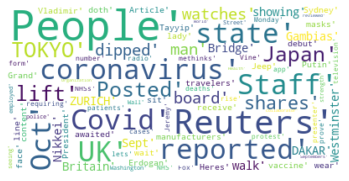

In [32]:
text = str(results)
wc = wordcloud.WordCloud(max_font_size=50, max_words = 100, background_color = 'white').generate(text)
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()